## Traveling Salesman Problem - Hill Climbing

### Import Packages

In [1]:
from pyomo.environ import *
import pyomo.environ as pyo
import random
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from IPython.display import clear_output
import time
import copy

### Inputs

In [2]:
#Generate Data Inputs

# Select random seed
random.seed(1)

# Number of cities
n=100

#Coordinate Range
rangelct=10000

#No. of swaps at each iteration
no_swap=1

#Generate random locations
coordlct_x = random.choices(range(0, rangelct), k=n)
coordlct_y = random.choices(range(0, rangelct), k=n)

#Compute distance between locations
distancelct=np.empty([n, n])
for i_index in range(n):
    for j_index in range(n):
        distancelct[i_index,j_index]=(math.sqrt(((coordlct_x[i_index]-coordlct_x[j_index])**2) +((coordlct_y[i_index]-coordlct_y[j_index])**2)))    

distancelct[np.diag_indices_from(distancelct)] = 99999

df = pd.DataFrame(distancelct)
df.index += 1
df.columns += 1
cij_model=df.stack().to_dict()


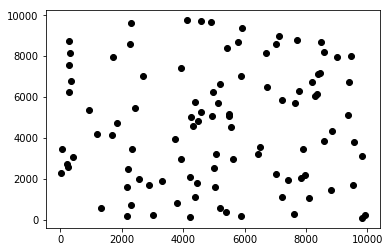

In [3]:
plt.plot(coordlct_x, coordlct_y, 'o', color='black');

### Solution Representation and Initial Solution

In [4]:
random.seed(1)
Solution_i=random.sample(list(range(n)), n)

dfSolution_i=pd.DataFrame(Solution_i)
dfSolution_i
dflinkindex_p1=dfSolution_i
dflinkindex_p2=dfSolution_i.shift(-1)
dflinkindex_p2.loc[n-1]=dflinkindex_p1.loc[0]
linkindex_p1=dflinkindex_p1.to_numpy()
linkindex_p2=dflinkindex_p2.to_numpy()
linkindex_p1=linkindex_p1.astype(int)
linkindex_p2=linkindex_p2.astype(int)
linkindex_p1=linkindex_p1.transpose()[0]
linkindex_p2=linkindex_p2.transpose()[0]


In [5]:
#Compute Objective Value
ObjValue=sum(distancelct[linkindex_p1,linkindex_p2])
ObjValue

508089.55416686134

In [6]:
#Exchange Operator
def swap_random(seq):
    idx = range(len(seq))
    i1, i2 = random.sample(idx, 2)
    seq[i1], seq[i2] = seq[i2], seq[i1]

In [7]:
#Insert Operator
def insert_random(seq):
    idx = range(len(seq))
    i1=random.sample(idx, 1)
    remove_index=np.where(np.array(seq)==i1)
    seq.pop(int(remove_index[0]))
    seq.insert(random.sample(idx, 1)[0], i1[0])

In [8]:
#3-Opt
def k_opt(seq):
    global Solution_i
    idx = range(len(seq))
    i1=np.sort(random.sample(idx, 2))

    #Split in 3 
    Opt1=seq[0:i1[0]]
    Opt2=seq[(i1[0]):i1[1]]
    Opt3=seq[(i1[1]):len(seq)]
    Opt2rev=Opt2[::-1]
    Opt3rev=Opt3[::-1]

    #3-Opt Solutions
    Sol1=Opt1+Opt2rev+Opt3rev
    Sol2=Opt1+Opt3+Opt2
    Sol3=Opt1+Opt3+Opt2rev
    Sol4=Opt1+Opt3rev+Opt2

    #2 Opt Solution
    Sol5=Opt1+Opt2rev+Opt3
    Sol6=Opt1+Opt2+Opt3rev
    Sol7=Opt1+Opt3rev+Opt2rev

    OptNeigh=[Sol1,Sol2,Sol3,Sol4,Sol5,Sol6,Sol7]

    ObjValue_Neigh=list();
    #Compute Obj Value of All Solutions
    for i_index in range(len(OptNeigh)):
        Solution_Neigh=OptNeigh[i_index]

        dfSolution_i=pd.DataFrame(Solution_Neigh)
        dflinkindex_p1=dfSolution_i
        dflinkindex_p2=dfSolution_i.shift(-1)
        dflinkindex_p2.loc[n-1]=dflinkindex_p1.loc[0]
        linkindex_p1=dflinkindex_p1.to_numpy()
        linkindex_p2=dflinkindex_p2.to_numpy()
        linkindex_p1=linkindex_p1.astype(int)
        linkindex_p2=linkindex_p2.astype(int)
        linkindex_p1=linkindex_p1.transpose()[0]
        linkindex_p2=linkindex_p2.transpose()[0]

        #Compute Objective Value
        ObjValue=sum(distancelct[linkindex_p1,linkindex_p2])
        ObjValue_Neigh=np.append(ObjValue_Neigh,ObjValue)
        OptNeigh[np.argmin(ObjValue_Neigh)]
        Solution_i=OptNeigh[np.argmin(ObjValue_Neigh)]

### Random Algorithm

In [9]:
random.seed(3)
iteration=0
ObjValueOpt=ObjValue
Objvalue_list=ObjValue
program_starts = time.time()
cputime_i=[0,0] 
OptSolution=Solution_i

while cputime_i[-1]<60:
    
    iteration=iteration+1
    Solution_i=copy.deepcopy(OptSolution)
    
    swap_it=0
    while swap_it<no_swap:
        swap_random(Solution_i)
        swap_it=swap_it+1
        
    dfSolution_i=pd.DataFrame(Solution_i)
    dfSolution_i
    dflinkindex_p1=dfSolution_i
    dflinkindex_p2=dfSolution_i.shift(-1)
    dflinkindex_p2.loc[n-1]=dflinkindex_p1.loc[0]
    linkindex_p1=dflinkindex_p1.to_numpy()
    linkindex_p2=dflinkindex_p2.to_numpy()
    linkindex_p1=linkindex_p1.astype(int)
    linkindex_p2=linkindex_p2.astype(int)
    linkindex_p1=linkindex_p1.transpose()[0]
    linkindex_p2=linkindex_p2.transpose()[0]
    
    #Compute Objective Value
    ObjValue=sum(distancelct[linkindex_p1,linkindex_p2])
    
    #Update Optimal Solution
    if ObjValue<ObjValueOpt:
        ObjValueOpt=copy.deepcopy(ObjValue)
        OptSolution=copy.deepcopy(Solution_i)
        
    Objvalue_list=np.append(Objvalue_list, ObjValueOpt)
    now = time.time()
    cputime_i=np.append(cputime_i, now-program_starts)
        
        #def connectpoints(x,y,p1,p2):
        #    x1, x2 = x[p1], x[p2]
        #    y1, y2 = y[p1], y[p2]
        #    plt.plot([x1,x2],[y1,y2],'k-')

        #for i_index in range(len(linkindex_p2)): 
        #    connectpoints(coordlct_x,coordlct_y,linkindex_p1[i_index],linkindex_p2[i_index])

        #plt.plot(coordlct_x, coordlct_y, 'o', color='black');

        #clear_output(wait=True)
        #plt.draw()
        #plt.pause(0.1)
        #plt.clf()
        
#Update last objective value
Objvalue_list=np.append(Objvalue_list, min(Objvalue_list))
now = time.time()
cputime_i=np.append(cputime_i, now-program_starts)

### Read output variables

In [10]:
min(Objvalue_list)

120133.17177001572

### Plot results

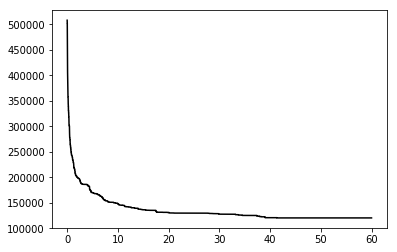

In [11]:
plt.plot(cputime_i[range(len(Objvalue_list))],Objvalue_list,'k-')

In [12]:
solutiondf=pd.DataFrame(cputime_i[range(len(Objvalue_list))],Objvalue_list)

#solutiondf.to_csv('SolDf.csv',index=True)

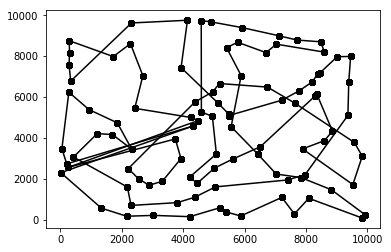

In [13]:
def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

for i_index in range(len(linkindex_p2)): 
    connectpoints(coordlct_x,coordlct_y,linkindex_p1[i_index],linkindex_p2[i_index])

    plt.plot(coordlct_x, coordlct_y, 'o', color='black');